In [ ]:
#https://www.kaggle.com/c/titanic


In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#set up dataframe
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#who were the passengers
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

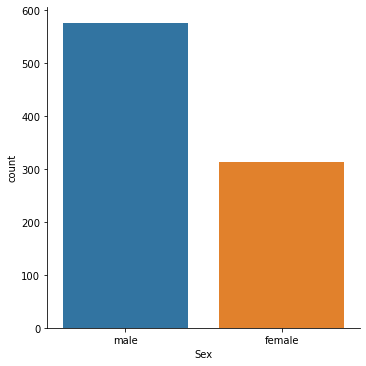

In [14]:
#factor plot is now catplot
sns.catplot(x='Sex', data=titanic_df, kind='count')

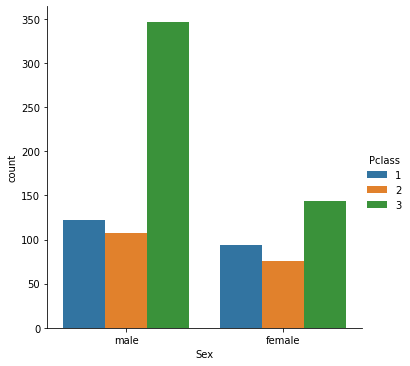

In [16]:
#separate them by classes
sns.catplot(x='Sex',data=titanic_df,kind='count',hue='Pclass')

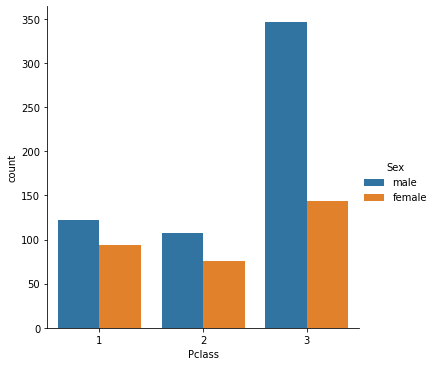

In [17]:
#separate by class
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Sex')

In [29]:
#split between male,female and children 
#use apply technique

def male_female_child(passenger):
    Age,Sex = passenger

    if Age < 16:
        return 'child'
    else:
        return Sex

In [30]:
#apply 
#create new column person
#grabbing the age and sex to apply the function
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [32]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


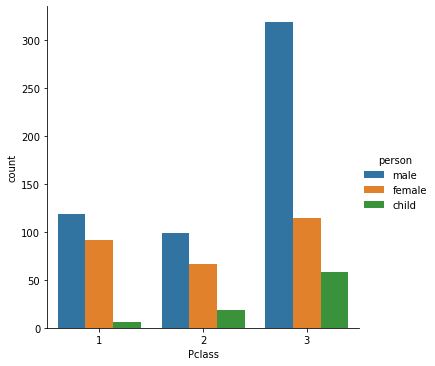

In [34]:


sns.catplot(x='Pclass',data=titanic_df,hue='person',kind='count')

<AxesSubplot:>

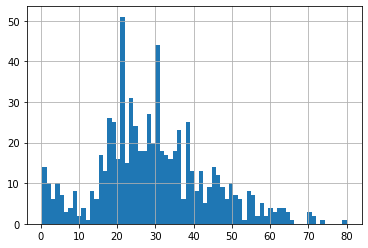

In [35]:
#by age we create historgram
titanic_df['Age'].hist(bins=70)

In [36]:
#find mean
titanic_df['Age'].mean()

29.69911764705882

In [38]:
#value counts
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

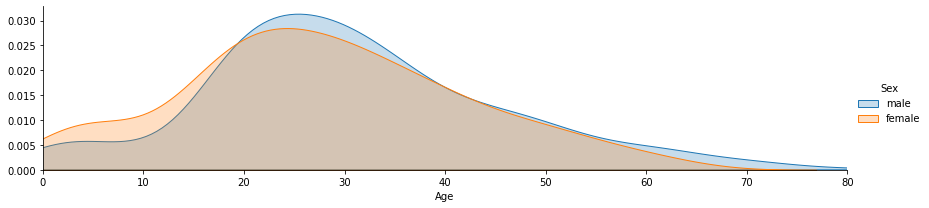

In [41]:
#facetgrid to visualize more data 
#facegrid multiple plots on 1 grid
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

#plot the age
fig.map(sns.kdeplot,'Age',shade=True)

#x-max to the oldest passenger
oldest = titanic_df['Age'].max()

#x limit
fig.set(xlim=(0,oldest))

fig.add_legend()

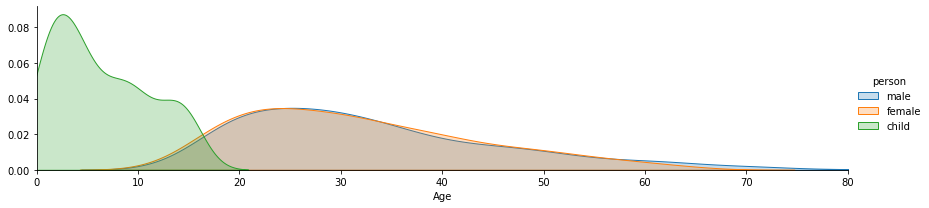

In [42]:
#to add children

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

#plot the age
fig.map(sns.kdeplot,'Age',shade=True)

#x-max to the oldest passenger
oldest = titanic_df['Age'].max()

#x limit
fig.set(xlim=(0,oldest))

fig.add_legend()

#the bandwith makes it to look like the age goes above 16 

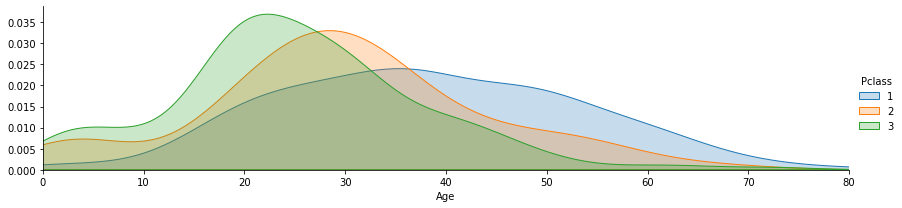

In [43]:
#classes
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

#plot the age
fig.map(sns.kdeplot,'Age',shade=True)

#x-max to the oldest passenger
oldest = titanic_df['Age'].max()

#x limit
fig.set(xlim=(0,oldest))

fig.add_legend()

In [44]:
#what deck the passengers were and whats their relation to the class
#look at the dataset
titanic_df.head()
#we have to drop the cabin null values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [45]:
deck = titanic_df['Cabin'].dropna()

In [46]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

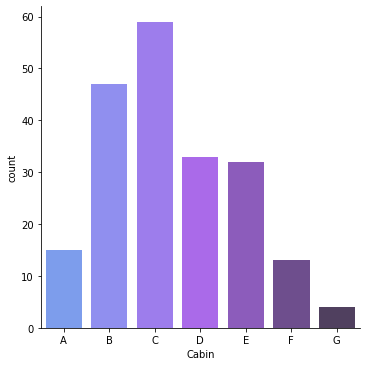

In [135]:
#grab the first letter with for loop

levels = []

for level in deck:
    levels.append(level[0])

#reset the dataframe by creating new dataframe with 1 column 
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_df,kind='count',palette='cool_d',order=['A','B','C','D','E','F','G'])
#color with _d makes it dark

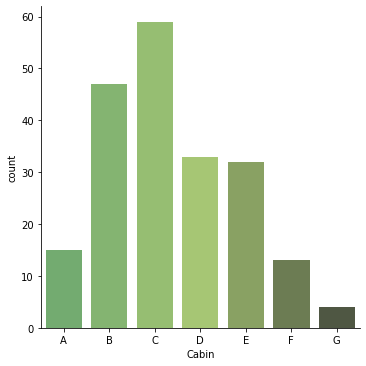

In [96]:
#we have to drop the T cabin as it doesnt make sense
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin',data=cabin_df,kind='count',palette='summer_d',order=['A','B','C','D','E','F','G'])

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


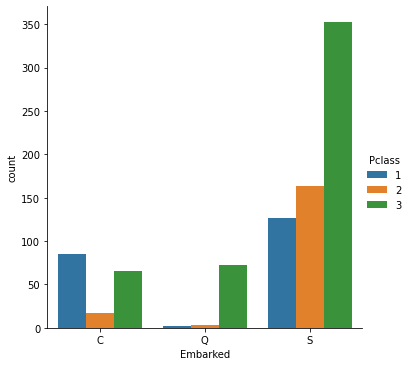

In [95]:
#where people came from 


sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')

In [97]:
#who was alone and who was with family
#add new column 
#if they have 0 for family and parch then they are alone
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [98]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [99]:
titanic_df['Alone']
#if its more than zero then they are people with family 

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [102]:
#look for things greater than 0 
titanic_df['Alone'].loc[titanic_df['Alone'] != 0] = 'With family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


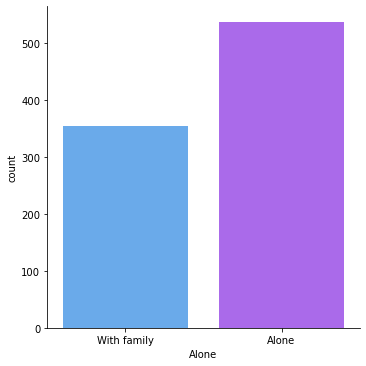

In [113]:
#visualizin g it
sns.catplot(x='Alone',data=titanic_df,palette='cool',kind='count')

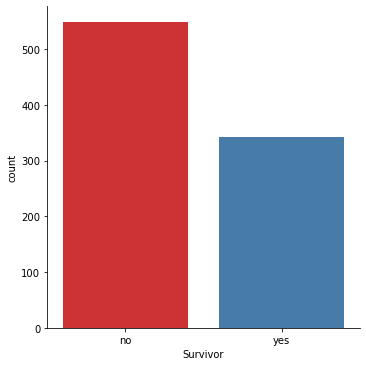

In [117]:
#what factor help someone sinking or crashing on titanic
#create a new column with mapping 
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
#make new column, grab from survived and map it with 0 as no and 1 as yes

sns.catplot(x='Survivor',data=titanic_df,kind='count',palette='Set1')

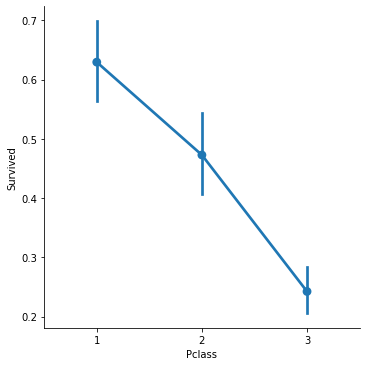

In [123]:
#which factors had factors on their survival rate
#find out if the class is the factor 

sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='point')

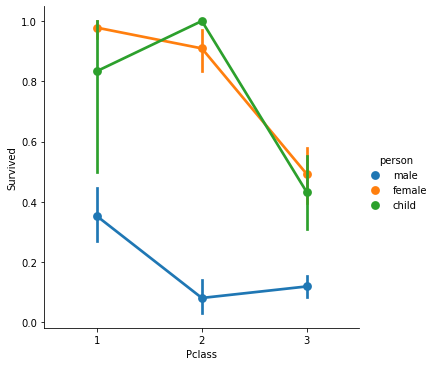

In [124]:
#considering class and gender 

sns.catplot(x='Pclass', y='Survived', hue= 'person',data=titanic_df, kind='point')

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


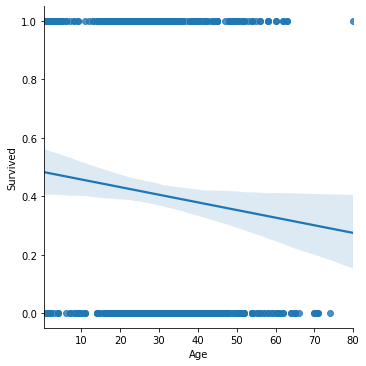

In [128]:
#use linear plot to see the age
sns.lmplot('Age','Survived',titanic_df)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


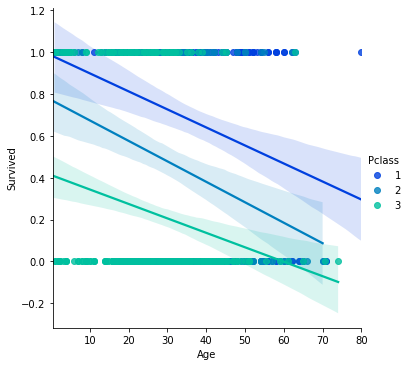

In [130]:
#to check class and 
sns.lmplot('Age','Survived',titanic_df, hue='Pclass',palette='winter')

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


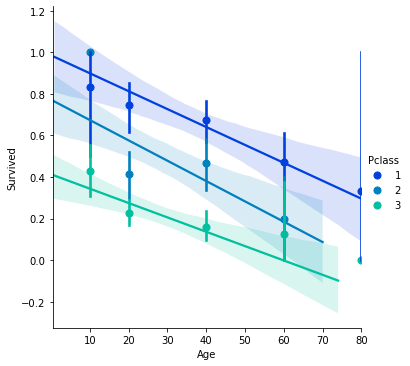

In [132]:
#clean
#create bins of ages
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',titanic_df, hue='Pclass',palette='winter',x_bins=generations)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


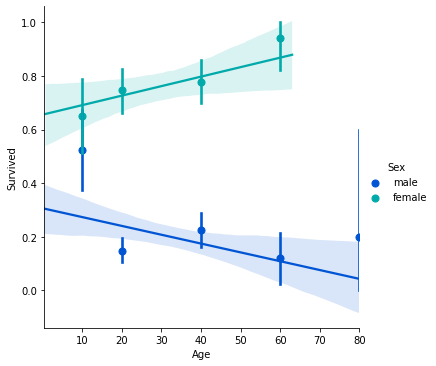

In [133]:
#gender and age 

sns.lmplot('Age','Survived',titanic_df, hue='Sex',palette='winter',x_bins=generations)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


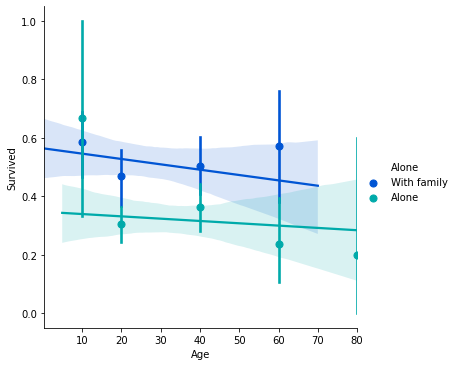

In [134]:
#did the deck have an effect on the passanger survival rate - yes
#did having a family memeber increase the odds of surviving the crash? 

sns.lmplot('Age','Survived',titanic_df, hue='Alone',palette='winter',x_bins=generations)